<a href="https://colab.research.google.com/github/soultanyousif/histogram-equalization/blob/main/histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install opencv-python

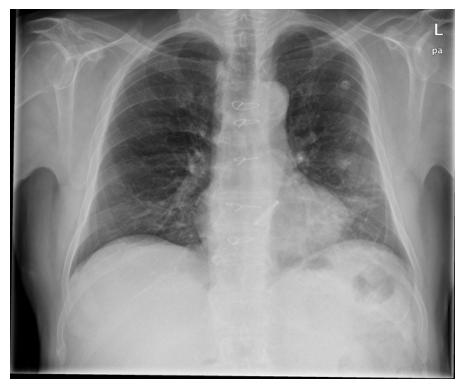

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

image_path = "/content/low quality x rayjpeg.jpeg"
image=cv2.imread(image_path)
low_quality_xray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(low_quality_xray)
plt.axis('off')
plt.show()



In [11]:
def make_histogram(image, bins=256):

    # array with size of bins, set to zeros
    histogram = np.zeros(bins)

    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1

    # return our final result
    return histogram

def cumsum(values):
    result = [values[0]]
    for i in values[1:]:
        result.append(result[-1] + i)
    return result

def normalize(entries):
    entries = np.array(entries)
    result = (entries - entries.min()) * 255 / (entries.max() - entries.min())
    return result.astype(np.uint8)

def equalizeHist(img):

    flatten_img = img.flatten() # convert array into 1D

    cumulativeSum = cumsum(make_histogram(flatten_img))

    cumulativeSum_norm = normalize(cumulativeSum)

    img_new_his = cumulativeSum_norm[flatten_img]

    # convert array back to original shape
    img_new = np.reshape(img_new_his, img.shape)

    return img_new, cumulativeSum_norm

def drawImage(orignal, result, hist):

    fig, axes = plt.subplots(2, 2, figsize=(10, 7))
    axes[0, 0].imshow(orignal, cmap='gray')
    axes[0, 0].set_title('Result before equalization')

    axes[1, 0].hist(orignal.flatten(), 256, [0,256])


    axes[0, 1].imshow(result, cmap='gray')
    axes[0, 1].set_title('Result after equalization')

    # Here you need to calculate hist of resulted image
    axes[1, 1].hist(result.ravel(),256,[0,256]);

    fig.savefig('Result.png')




In [12]:
result, normalized_cumsum = equalizeHist(low_quality_xray)

/tmp/ipython-input-2169308513.py:45: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1, 0].hist(orignal.flatten(), 256, [0,256])
/tmp/ipython-input-2169308513.py:52: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  axes[1, 1].hist(result.ravel(),256,[0,256]);


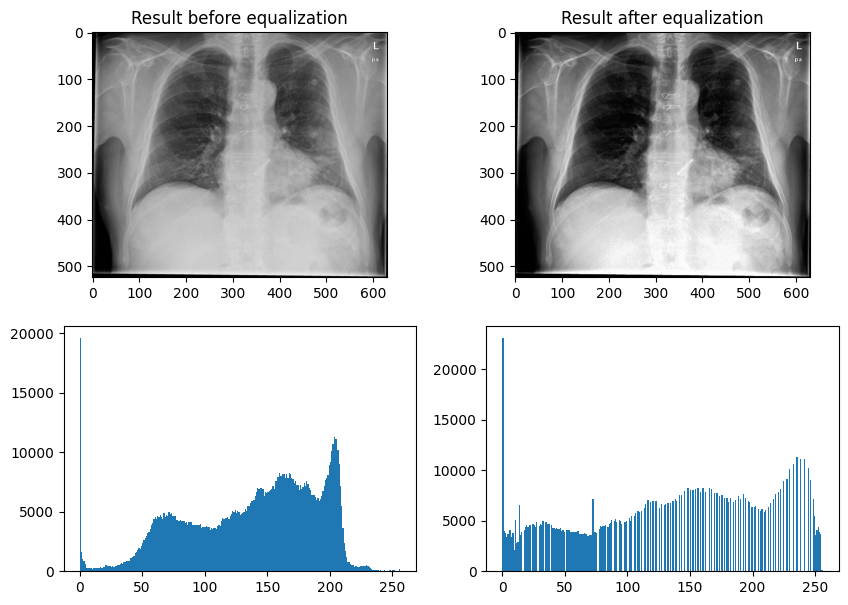

In [13]:
drawImage(low_quality_xray, result, normalized_cumsum)

# **on opencv you can just perform this**

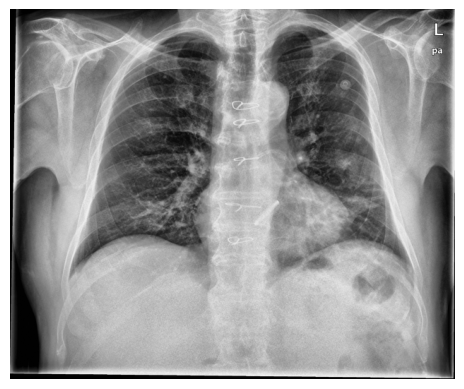

In [14]:
import cv2
img = cv2.imread("/content/low quality x rayjpeg.jpeg", cv2.IMREAD_GRAYSCALE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized = clahe.apply(img)
plt.imshow(equalized, cmap='gray')
plt.axis('off')
plt.show()